In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from joblib import dump, load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('feetsZTFandAPOGEE.csv')
display(data)

,oid,filtercode,source_id_01_x,apogee_id_01_x,FEETS_ra,FEETS_dec,FEETS_Amplitude,FEETS_AndersonDarling,FEETS_Autocor_length,FEETS_Beyond1Std,...,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,APOGEE_FE_H,APOGEE_FE_H_ERR,APOGEE_FE_H_FLAG
0,245113200002473,zg,2364561950954447872,2M00135100-2055372,3.462713,-20.926921,0.084504,0.885343,2.0,0.285024,...,13.2033,339.67538,337.28570,342.69803,339.43900,337.17358,342.77347,-0.161730,0.013648,0
1,245113200002686,zg,2364556247237856256,2M00131008-2058054,3.292288,-20.968287,0.068747,1.000000,1.0,0.101449,...,14.0735,295.23508,292.65470,297.42520,295.36190,292.47882,298.53436,-0.076917,0.011298,0
2,245113200002901,zg,2364555899344878976,2M00131027-2100087,3.292733,-21.002473,0.068613,1.000000,1.0,0.144231,...,13.3797,340.71540,325.15480,368.62686,333.32245,316.79538,350.01495,-0.227580,0.011440,0
3,245113200002972,zg,2364555280869588480,2M00133364-2100524,3.390128,-21.014581,0.068843,1.000000,1.0,0.163462,...,12.4275,170.18893,169.71016,170.66193,170.24036,169.78642,170.81667,-0.120960,0.012339,0
4,245114100000600,zg,2364732203458207360,2M00085954-2038355,2.248187,-20.643443,0.099483,1.000000,1.0,0.111111,...,14.7157,295.60330,291.74728,299.22214,296.27444,291.86102,302.36694,-0.255940,0.013686,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59172,1795116400002164,zg,1608320292912053120,2M14154780+5351450,213.949116,53.862705,0.035544,1.000000,1.0,0.091346,...,13.6469,169.56201,169.03460,170.10419,169.41536,168.92456,169.96484,-0.138960,0.011083,0
59173,1795116400003508,zg,1608294385669318912,2M14144682+5340576,213.694862,53.682651,0.029783,1.000000,1.0,0.217391,...,13.2998,225.06349,224.21277,225.85630,225.28221,224.37021,226.21147,-0.086607,0.011024,0
59174,1795116400004249,zg,1608264080380119808,2M14172437+5337015,214.351687,53.617110,0.022659,1.000000,1.0,0.211538,...,13.9793,493.21707,452.54745,536.97830,471.73440,437.41315,506.21692,-0.439820,0.016354,0
59175,1795116400013559,zg,1608239307008739968,2M14153620+5321458,213.900858,53.362662,0.031648,0.999998,1.0,0.250000,...,11.0823,2437.09810,2364.41380,2519.58500,2444.65190,2364.09130,2537.68240,-0.404300,0.008769,0


In [3]:
counter = 0
for col in data.columns:
    print(f"[{counter}] {col}")
    counter = counter + 1

[0] oid
[1] filtercode
[2] source_id_01_x
[3] apogee_id_01_x
[4] FEETS_ra
[5] FEETS_dec
[6] FEETS_Amplitude
[7] FEETS_AndersonDarling
[8] FEETS_Autocor_length
[9] FEETS_Beyond1Std
[10] FEETS_CAR_mean
[11] FEETS_CAR_sigma
[12] FEETS_CAR_tau
[13] FEETS_Con
[14] FEETS_Eta_e
[15] FEETS_FluxPercentileRatioMid20
[16] FEETS_FluxPercentileRatioMid35
[17] FEETS_FluxPercentileRatioMid50
[18] FEETS_FluxPercentileRatioMid65
[19] FEETS_FluxPercentileRatioMid80
[20] FEETS_Freq1_harmonics_amplitude_0
[21] FEETS_Freq1_harmonics_amplitude_1
[22] FEETS_Freq1_harmonics_amplitude_2
[23] FEETS_Freq1_harmonics_amplitude_3
[24] FEETS_Freq1_harmonics_rel_phase_0
[25] FEETS_Freq1_harmonics_rel_phase_1
[26] FEETS_Freq1_harmonics_rel_phase_2
[27] FEETS_Freq1_harmonics_rel_phase_3
[28] FEETS_Freq2_harmonics_amplitude_0
[29] FEETS_Freq2_harmonics_amplitude_1
[30] FEETS_Freq2_harmonics_amplitude_2
[31] FEETS_Freq2_harmonics_amplitude_3
[32] FEETS_Freq2_harmonics_rel_phase_0
[33] FEETS_Freq2_harmonics_rel_phase_1
[3

In [5]:
# Meta columns to exclude

hr2 = 0
n = 1

while (hr2 < 0.9 and n < 6) :
    meta_columns = ['oid', 'filtercode', 'source_id_01', 'apogee_id_01']

    # Columns to use for training (excluding GAIA and most APOGEE data)
    training_columns = [col for col in data.columns if (col.startswith('ZTF_') or col.startswith('FEETS_') or col in ['APOGEE_TEFF', 'APOGEE_FE_H','RV_TEFF', 'RV_FEH']) and col not in ['ZTF_dist', 'ZTF_dist_x']]

    # Prepare feature and target data
    X = data[training_columns]
    y = data['APOGEE_LOGG']  # You can change this to 'APOGEE_LOGG_SPEC' or 'APOGEE_RV_LOGG' if needed

    # Create the preprocessing pipeline
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Step 1: Impute missing values with mean
        ('scaling', StandardScaler()),  # Step 2: Standardize the features
        ('feature_selection', SelectKBest(score_func=f_regression, k=20)),  # Step 3: Select top 100 features
    ])

    # Fit and transform the data
    X_preprocessed = pipeline.fit_transform(X, y)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    rfr = RandomForestRegressor(n_estimators=n*100, random_state=42)
    rfr.fit(X_train, y_train)

    # Make predictions
    y_pred = rfr.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    if r2 > hr2:
        hr2 = r2
        print(f"attempt {n} exceeds {n-1}")
    else:
        print(f"attempt {n} failed to exceed {n-1}")
    # Display metrics
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    n = n+1

        
        


/astro/users/ifc2002/.conda/envs/project_meltheat_v2/lib/python3.9/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['ZTF_smallkurtosis' 'ZTF_stetsonj' 'ZTF_stetsonk' 'ZTF_weightedmagrms'
 'ZTF_weightedmeanmag']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


attempt 1 exceeds 0
Mean Squared Error: 0.5400034568914897
R² Score: 0.7086743415138215


/astro/users/ifc2002/.conda/envs/project_meltheat_v2/lib/python3.9/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['ZTF_smallkurtosis' 'ZTF_stetsonj' 'ZTF_stetsonk' 'ZTF_weightedmagrms'
 'ZTF_weightedmeanmag']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


attempt 2 exceeds 1
Mean Squared Error: 0.5382232879700356
R² Score: 0.7096347221866501


/astro/users/ifc2002/.conda/envs/project_meltheat_v2/lib/python3.9/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['ZTF_smallkurtosis' 'ZTF_stetsonj' 'ZTF_stetsonk' 'ZTF_weightedmagrms'
 'ZTF_weightedmeanmag']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


attempt 3 exceeds 2
Mean Squared Error: 0.537152891336933
R² Score: 0.7102121888676507


/astro/users/ifc2002/.conda/envs/project_meltheat_v2/lib/python3.9/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['ZTF_smallkurtosis' 'ZTF_stetsonj' 'ZTF_stetsonk' 'ZTF_weightedmagrms'
 'ZTF_weightedmeanmag']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


attempt 4 exceeds 3
Mean Squared Error: 0.5366081206339346
R² Score: 0.7105060864006195


/astro/users/ifc2002/.conda/envs/project_meltheat_v2/lib/python3.9/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['ZTF_smallkurtosis' 'ZTF_stetsonj' 'ZTF_stetsonk' 'ZTF_weightedmagrms'
 'ZTF_weightedmeanmag']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


attempt 5 failed to exceed 4
Mean Squared Error: 0.5367390857398802
R² Score: 0.7104354322312036


In [7]:
# Create a subdirectory to save models and metrics
output_dir = 'RFRexp3'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the trained model
model_path = os.path.join(output_dir, 'random_forest_regressor.joblib')
dump(rfr, model_path)

['RFRexp3/random_forest_regressor.joblib']

In [ ]:


# Save metrics as CSV
metrics_df = pd.DataFrame({
    'Mean Squared Error': [mse],
    'R² Score':[r2]
   
})
metrics_path = os.path.join(output_dir, 'metrics.csv')
metrics_df.to_csv(metrics_path, index=False)

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rfr, X_preprocessed, y, cv=5, scoring='r2')
print(f'Cross-validated R² scores: {cv_scores}')
print(f'Mean Cross-validated R² score: {np.mean(cv_scores)}')



# Save cross-validation metrics to CSV
cv_metrics_path = os.path.join(output_dir, 'cv_metrics.csv')
cv_metrics_df.to_csv(cv_metrics_path, index=False)



In [ ]:
# Save cross-validation metrics to CSV
cv_metrics_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'R² Score': cv_scores
})
cv_metrics_path = os.path.join(output_dir, 'cv_metrics.csv')
cv_metrics_df.to_csv(cv_metrics_path, index=False)


In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rfr.feature_importances_

# Get the names of the selected features
selected_features = pipeline.named_steps['feature_selection'].get_feature_names_out()

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

# Sort by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Save feature importances to CSV
importances_path = os.path.join(output_dir, 'feature_importances.csv')
importances_df.to_csv(importances_path, index=False)

# Save the plot
plot_path = os.path.join(output_dir, 'feature_importances.png')
plt.savefig(plot_path)

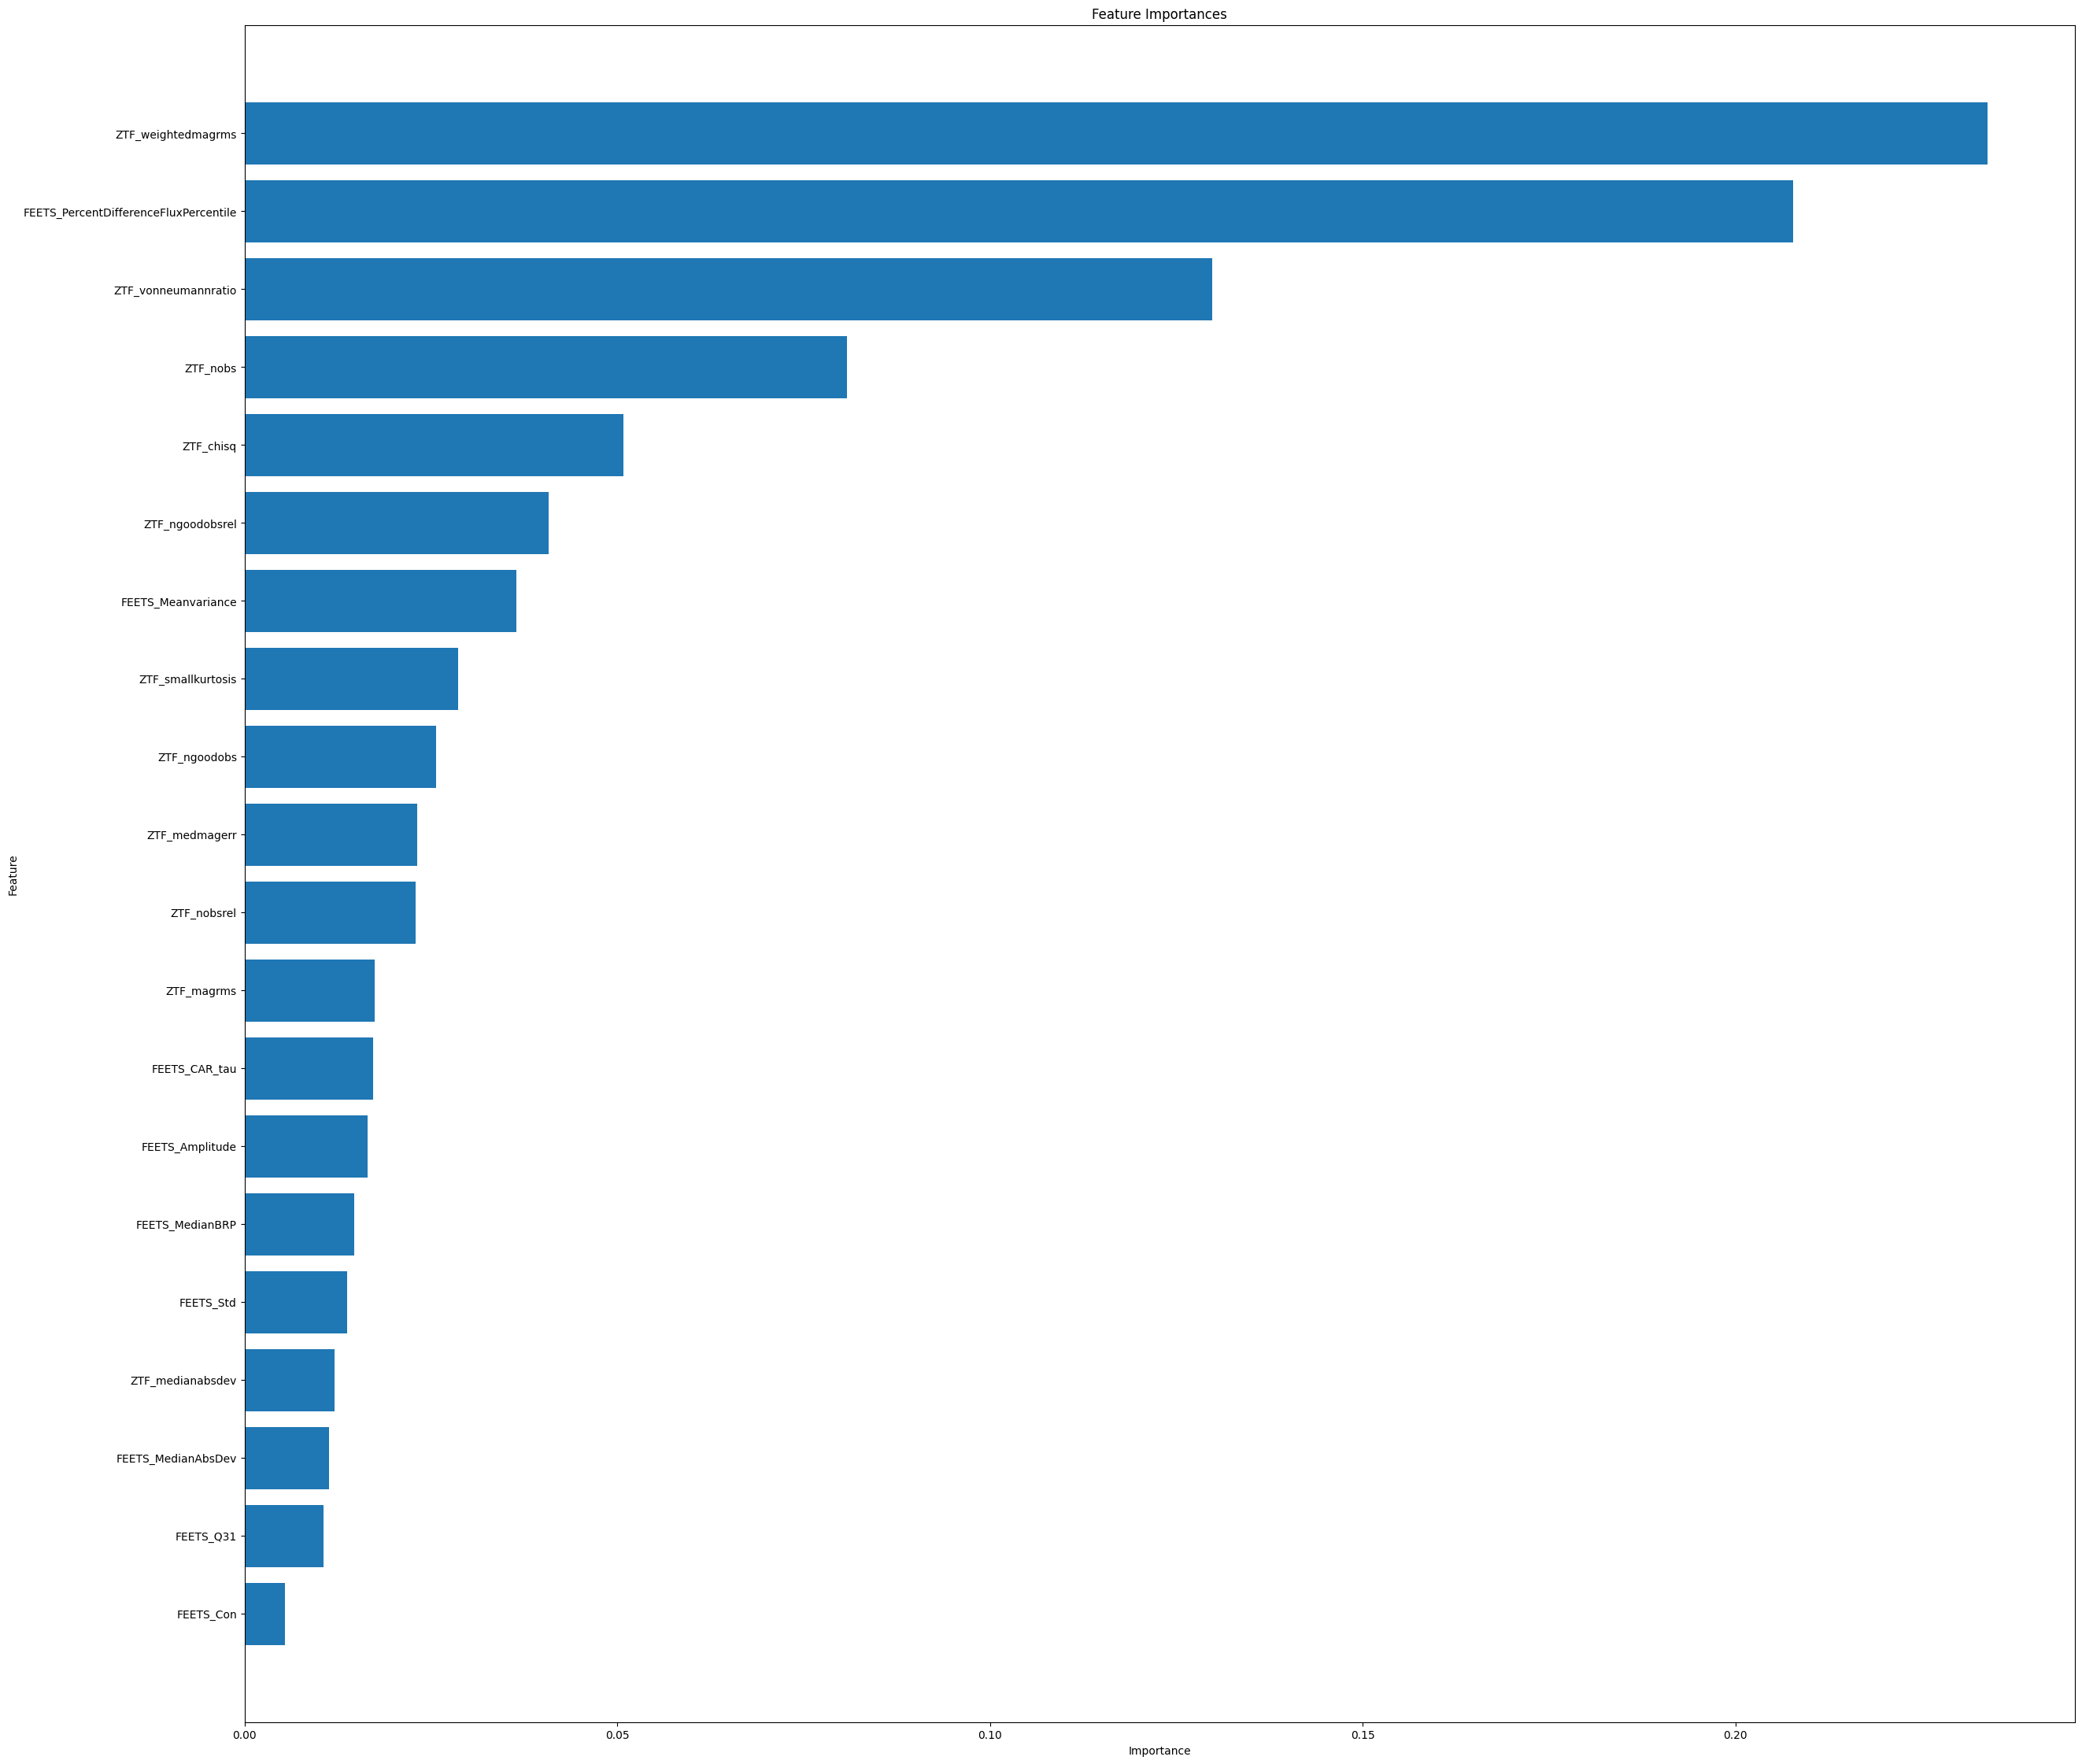

In [8]:
import os
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt

# Assuming the output directory, pipeline, and model are already defined and fitted

# Extract the indices of the selected features
selected_feature_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)

# Map the selected feature indices to the original column names
selected_feature_names = [training_columns[i] for i in selected_feature_indices]

# Get feature importances from the fitted model
feature_importances = rfr.feature_importances_

# Create a DataFrame using the original column names and their importances
importances_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Save feature importances to CSV
importances_path = os.path.join(output_dir, 'feature_importances.csv')
importances_df.to_csv(importances_path, index=False)

# Plot feature importances
plt.figure(figsize=(30, 28))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()

# Save the plot
plot_path = os.path.join(output_dir, 'feature_importances.png')
plt.savefig(plot_path)
plt.show()
